## Domain adaptation with optimal transport

In [1]:
import numpy as np
import matplotlib.pylab as pl
import ot


### Dataset generation (classification problem) 

In [2]:
n=150 # nb samples in source and target datasets

xs,ys=ot.datasets.get_data_classif('3gauss',n)
xt,yt=ot.datasets.get_data_classif('3gauss2',n)

### Plot datasets

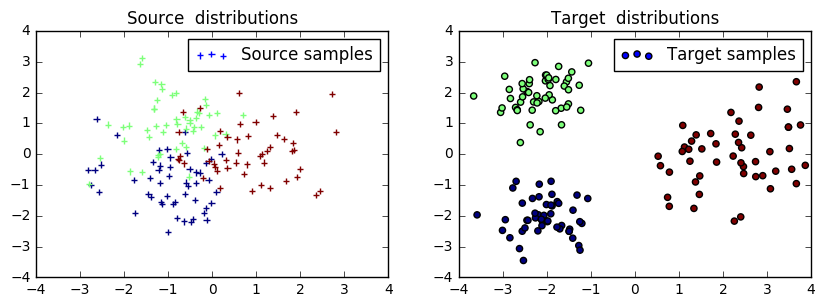

In [3]:
pl.figure(1,(10,7))

pl.subplot(2,2,1)
pl.scatter(xs[:,0],xs[:,1],c=ys,marker='+',label='Source samples')
pl.legend(loc=0)
pl.axis([-4,4,-4,4])
pl.title('Source  distributions')

pl.subplot(2,2,2)
pl.scatter(xt[:,0],xt[:,1],c=yt,marker='o',label='Target samples')
pl.legend(loc=0)
pl.axis([-4,4,-4,4])
pl.title('Target  distributions')

pl.show()


## Domain adaptation classes

In [4]:
# LP problem
da_emd=ot.da.OTDA()     # init class
da_emd.fit(xs,xt)       # fit distributions
xst0=da_emd.interp()    # interpolation of source samples


# sinkhorn regularization
lambd=1e-1
da_entrop=ot.da.OTDA_sinkhorn()
da_entrop.fit(xs,xt,reg=lambd)
xsts=da_entrop.interp()

# Group lasso regularization
reg=1e-1
eta=1e0
da_lpl1=ot.da.OTDA_lpl1()
da_lpl1.fit(xs,ys,xt,reg=lambd,eta=eta)
xstg=da_lpl1.interp()

### Plot  OT matrices and interpolated samples 

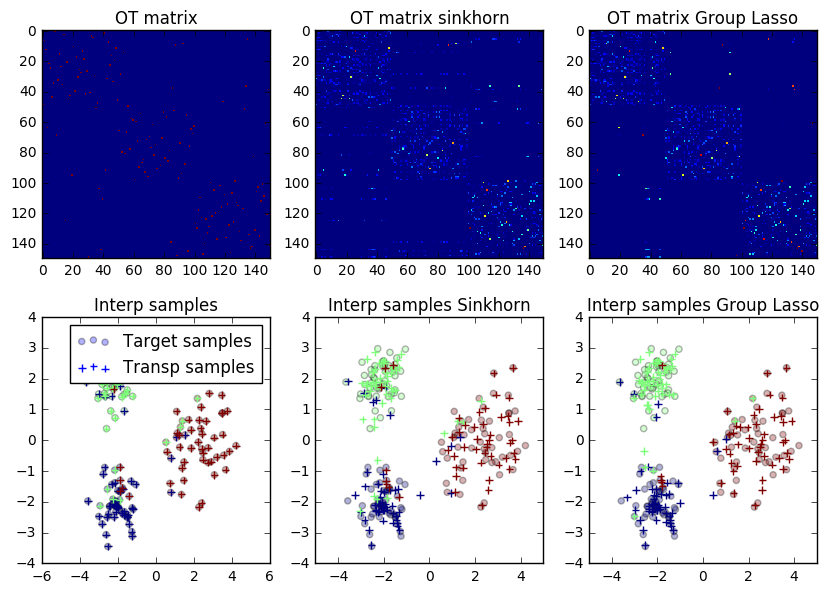

In [5]:
pl.figure(4,(10,7))

param_img={'interpolation':'nearest','cmap':'jet'}

pl.subplot(2,3,1)
pl.imshow(da_emd.G,**param_img)
pl.title('OT matrix')


pl.subplot(2,3,2)
pl.imshow(da_entrop.G,**param_img)
pl.title('OT matrix sinkhorn')

pl.subplot(2,3,3)
pl.imshow(da_lpl1.G,**param_img)
pl.title('OT matrix Group Lasso')

pl.subplot(2,3,4)
pl.scatter(xt[:,0],xt[:,1],c=yt,marker='o',label='Target samples',alpha=0.3)
pl.scatter(xst0[:,0],xst0[:,1],c=ys,marker='+',label='Transp samples',s=30)
pl.title('Interp samples')
pl.legend(loc=0)

pl.subplot(2,3,5)
pl.scatter(xt[:,0],xt[:,1],c=yt,marker='o',label='Target samples',alpha=0.3)
pl.scatter(xsts[:,0],xsts[:,1],c=ys,marker='+',label='Transp samples',s=30)
pl.title('Interp samples Sinkhorn')

pl.subplot(2,3,6)
pl.scatter(xt[:,0],xt[:,1],c=yt,marker='o',label='Target samples',alpha=0.3)
pl.scatter(xstg[:,0],xstg[:,1],c=ys,marker='+',label='Transp samples',s=30)
pl.title('Interp samples Group Lasso')

pl.show()